In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import json

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
from bcnf.models.cnf import CondRealNVP_v2
from bcnf.utils import get_dir
from bcnf.simulation.resimulation import resimulate
from bcnf.utils import load_config, load_data, sub_root_path

from bcnf.train.trainer_data_handler import TrainerDataHandler
from bcnf.train.utils import get_data_type

## Model

In [3]:
MODEL_NAME = f'trajectory_TRF_small'

In [4]:
with open(os.path.join(get_dir('models', 'bcnf-models', MODEL_NAME), 'config.json'), 'r') as f:
    config = load_config(json.load(f)['config_path'])
    config['data']['path'] = sub_root_path(config['data']['path']).replace('/train', '/test')
    print(config['data']['path'])

cnf = CondRealNVP_v2.from_config(config).to(device)

cnf.load_state_dict(torch.load(os.path.join(get_dir('models', 'bcnf-models', MODEL_NAME), "state_dict.pt")))

cnf.eval();

/home/psaegert/Projects/bcnf/data/bcnf-data/fixed_data_render_2s_15FPS/test


In [5]:
print(f'Number of parameters: {cnf.n_params:,}')

Number of parameters: 128,129


In [6]:
parameter_selection = cnf.parameter_index_mapping.parameters

## Data

In [7]:
T = 2
dt = 1/15

In [8]:
# data = load_data(sub_root_path(config['data']['path']).replace('/train', '/test'), verbose=True, keep_output_type='trajectories')
data = load_data(sub_root_path(config['data']['path']).replace('/train', '/test'), verbose=True, keep_output_type='trajectories')

y, conditions = TrainerDataHandler().get_data_for_training(
    config,
    cnf.parameter_index_mapping,
    dtype=get_data_type(dtype=config["global"]["dtype"]),
    return_tensor_dataset=False)

print(f'{y.shape=}')
for condition in conditions:
    print(f'{condition.shape=}')

Loading data from directory: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it, file=fixed_data_render_2s_15FPS_5.pkl]


y.shape=torch.Size([1000, 19])
condition.shape=torch.Size([1000, 30, 3])


## Resimulation

In [9]:
data['g_z'] = data.pop('g')
data['g_x'] = np.zeros_like(data['g_z'])
data['g_y'] = np.zeros_like(data['g_z'])

In [10]:
# https://github.com/scipy/scipy/issues/15940
# When unexpectedly slow, check if the videos have been loaded instead of trajectories
X_resimulation = resimulate(
    cnf,
    T,
    dt,
    data,
    None,
    *conditions,
    m_samples=1_000,
    batch_size=32,
    break_on_impact=True,
    n_procs=32
)

Batch Sampling: 100%|██████████| 32/32 [00:10<00:00,  3.19it/s]


Resimulating 1000 trajectories 1000 times


Resimulating trajectories with 32 processes:   0%|          | 0/1000 [00:00<?, ?it/s]/home/psaegert/Projects/bcnf/src/bcnf/simulation/physics.py:147: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  v_sol = odeint(ballistic_ODE, v0, t, args=(g, w, b, m, rho, r, a))
/home/psaegert/Projects/bcnf/src/bcnf/simulation/physics.py:147: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  v_sol = odeint(ballistic_ODE, v0, t, args=(g, w, b, m, rho, r, a))
/home/psaegert/Projects/bcnf/src/bcnf/simulation/physics.py:147: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  v_sol = odeint(ballistic_ODE, v0, t, args=(g, w, b, m, rho, r, a))
/home/psaegert/Projects/bcnf/src/bcnf/simulation/physics.py:147: ODEintWarning: Excess work done on this call (perhaps wron

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1466821144725D+01   r2 =  0.9183403816677D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1466821144725D+01   r2 =  0.9183403816677D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1466821144725D+01   r2 =  0.9183403816677D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1466821144725D+01   r2 =  0.9183403816677D-16
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes:   7%|▋         | 69/1000 [00:16<03:32,  4.38it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1266897012293D+01   r2 =  0.9862933296551D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1266897012293D+01   r2 =  0.9862933296551D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1266897012293D+01   r2 =  0.9862933296551D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1266897012293D+01   r2 =  0.9862933296551D-16
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes:  21%|██        | 209/1000 [00:49<03:04,  4.28it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1606580902024D+01   r2 =  0.9352058070904D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1606580902024D+01   r2 =  0.9352058070904D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1606580902024D+01   r2 =  0.7743341257144D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1606580902024D+01   r2 =  0.7743341257144D-16
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes:  25%|██▌       | 251/1000 [00:59<03:02,  4.11it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7333347161710D+00   r2 =  0.5335869426604D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7333347161710D+00   r2 =  0.5335869426604D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7333347161710D+00   r2 =  0.5335869426604D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.7333347161710D+00   r2 =  0.5335869426604D-16
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes:  30%|███       | 303/1000 [01:11<02:46,  4.18it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1405902390733D+01   r2 =  0.9746664787285D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1405902390733D+01   r2 =  0.9746664787285D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1405902390733D+01   r2 =  0.9746664787285D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1405902390733D+01   r2 =  0.9746664787285D-16
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes:  36%|███▌      | 362/1000 [01:25<02:22,  4.49it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1477474615203D+01   r2 =  0.1035962925261D-15


Resimulating trajectories with 32 processes:  39%|███▉      | 394/1000 [01:32<02:29,  4.06it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1200115897715D+01   r2 =  0.9667721014864D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1200115897715D+01   r2 =  0.9667721014864D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1200115897715D+01   r2 =  0.9667721014864D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1200115897715D+01   r2 =  0.9667721014864D-16
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes:  41%|████      | 409/1000 [01:36<02:25,  4.08it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1338852208035D+01   r2 =  0.9495655811228D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1338852208035D+01   r2 =  0.9495655811228D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1338852208035D+01   r2 =  0.7862237684522D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1338852208035D+01   r2 =  0.7862237684522D-16
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes:  46%|████▌     | 462/1000 [01:48<01:58,  4.53it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1208066742516D+01   r2 =  0.1060172558083D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1208066742516D+01   r2 =  0.1060172558083D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1208066742516D+01   r2 =  0.8778044197691D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1208066742516D+01   r2 =  0.8778044197691D-16
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes:  52%|█████▏    | 522/1000 [02:02<02:07,  3.75it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1804528370994D+01   r2 =  0.1010508436171D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1804528370994D+01   r2 =  0.1010508436171D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1804528370994D+01   r2 =  0.8366833913541D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1804528370994D+01   r2 =  0.8366833913541D-16
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes:  76%|███████▋  | 763/1000 [03:00<01:01,  3.88it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1600000808044D+01   r2 =  0.9867574966084D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1600000808044D+01   r2 =  0.9867574966084D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1600000808044D+01   r2 =  0.9867574966084D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1600000808044D+01   r2 =  0.9867574966084D-16
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes:  86%|████████▋ | 864/1000 [03:23<00:30,  4.40it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1133695725276D+01   r2 =  0.1028924313063D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1133695725276D+01   r2 =  0.1028924313063D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1133695725276D+01   r2 =  0.1028924313063D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1133695725276D+01   r2 =  0.1028924313063D-15


Resimulating trajectories with 32 processes:  88%|████████▊ | 878/1000 [03:27<00:26,  4.55it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1733617566647D+01   r2 =  0.1033162475637D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1733617566647D+01   r2 =  0.1033162475637D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1733617566647D+01   r2 =  0.1033162475637D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1733617566647D+01   r2 =  0.1033162475637D-15
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes:  95%|█████████▌| 953/1000 [03:45<00:11,  4.13it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1538184236668D+01   r2 =  0.1099870863669D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1538184236668D+01   r2 =  0.1099870863669D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1538184236668D+01   r2 =  0.1099870863669D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1538184236668D+01   r2 =  0.1099870863669D-15
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes: 100%|█████████▉| 999/1000 [03:55<00:00,  4.37it/s]

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1866986514894D+01   r2 =  0.9836271225301D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1866986514894D+01   r2 =  0.9836271225301D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1866986514894D+01   r2 =  0.9836271225301D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1866986514894D+01   r2 =  0.9836271225301D-16
 lsoda--  warning..internal t (=r1) 

Resimulating trajectories with 32 processes: 100%|██████████| 1000/1000 [03:56<00:00,  4.22it/s]


In [11]:
X_resimulation.shape

(1000, 1000, 30, 3)

In [12]:
X = conditions[0].cpu().numpy()

In [13]:
X.shape

(1000, 30, 3)

## Resimulation Error

In [14]:
X_error = (X_resimulation - X[:, None, :, :])**2

In [15]:
X_errors = np.nanmedian(X_error, axis=(1, 3))

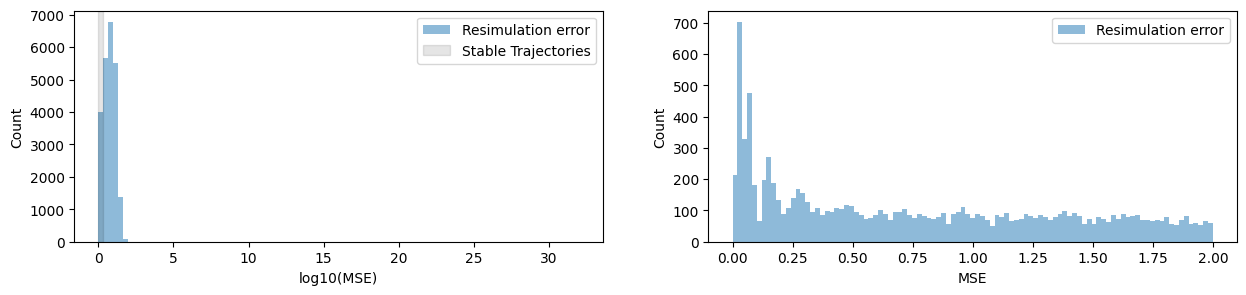

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

zoom_until = 2

axes[0].hist(np.log10(X_errors.flatten()), bins=np.linspace(0, 32, 100), alpha=0.5, label='Resimulation error');
axes[0].axvspan(0, np.log10(zoom_until), alpha=0.1, color='k', label='Stable Trajectories')

axes[0].set_xlabel('log10(MSE)')
axes[0].set_ylabel('Count')

axes[0].legend()

axes[1].hist(X_errors.flatten(), bins=np.linspace(0, zoom_until, 100), alpha=0.5, label='Resimulation error');

axes[1].set_xlabel('MSE')
axes[1].set_ylabel('Count')

axes[1].legend()

In [17]:
STEPS = T / dt

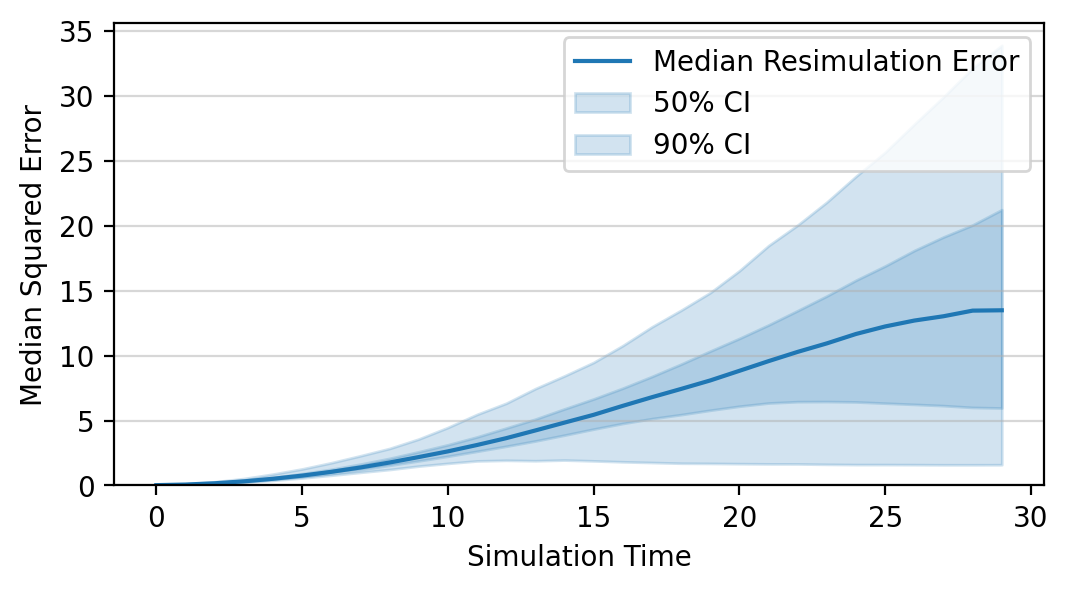

In [18]:
# Show the median resimulation error over simulation time
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=200)

ax.plot(np.nanmedian(X_errors, axis=0), label='Median Resimulation Error')
ax.fill_between(np.arange(STEPS), *np.nanpercentile(X_errors, [25, 75], axis=0), alpha=0.2, color='C0', label='50% CI')
ax.fill_between(np.arange(STEPS), *np.nanpercentile(X_errors, [5, 95], axis=0), alpha=0.2, color='C0', label='90% CI')
ax.set_ylim(0, None)

ax.set_xlabel('Simulation Time')
ax.set_ylabel('Median Squared Error')
ax.legend()
ax.grid(axis='y', alpha=0.5)

plt.savefig(os.path.join(get_dir('results', f'{MODEL_NAME}', 'figures', create=True), 'resimulation_error.png'), bbox_inches='tight')

## Impact

In [19]:
# For each simulation i, find the indices j (sample), t (timestep), k in [i, j, t, -1] where X_resimulation changes sign from positive to negative
impact_indices = [np.where(np.diff((X_resimulation[i, :, :, -1] > 0).astype(int), axis=1) == -1) for i in range(X_resimulation.shape[0])]

# Get the potitions at the impact indices for each simulation i and sample j at time t
X_resimulation_impact_positions = [X_resimulation[i, impact_indices[i][0], impact_indices[i][1], :] for i in range(X_resimulation.shape[0])]

In [20]:
true_impact_indices = np.where(np.diff((X[:, :, -1] > 0).astype(int)) == -1)

X_val_impact_positions = X[true_impact_indices[0], true_impact_indices[1]]

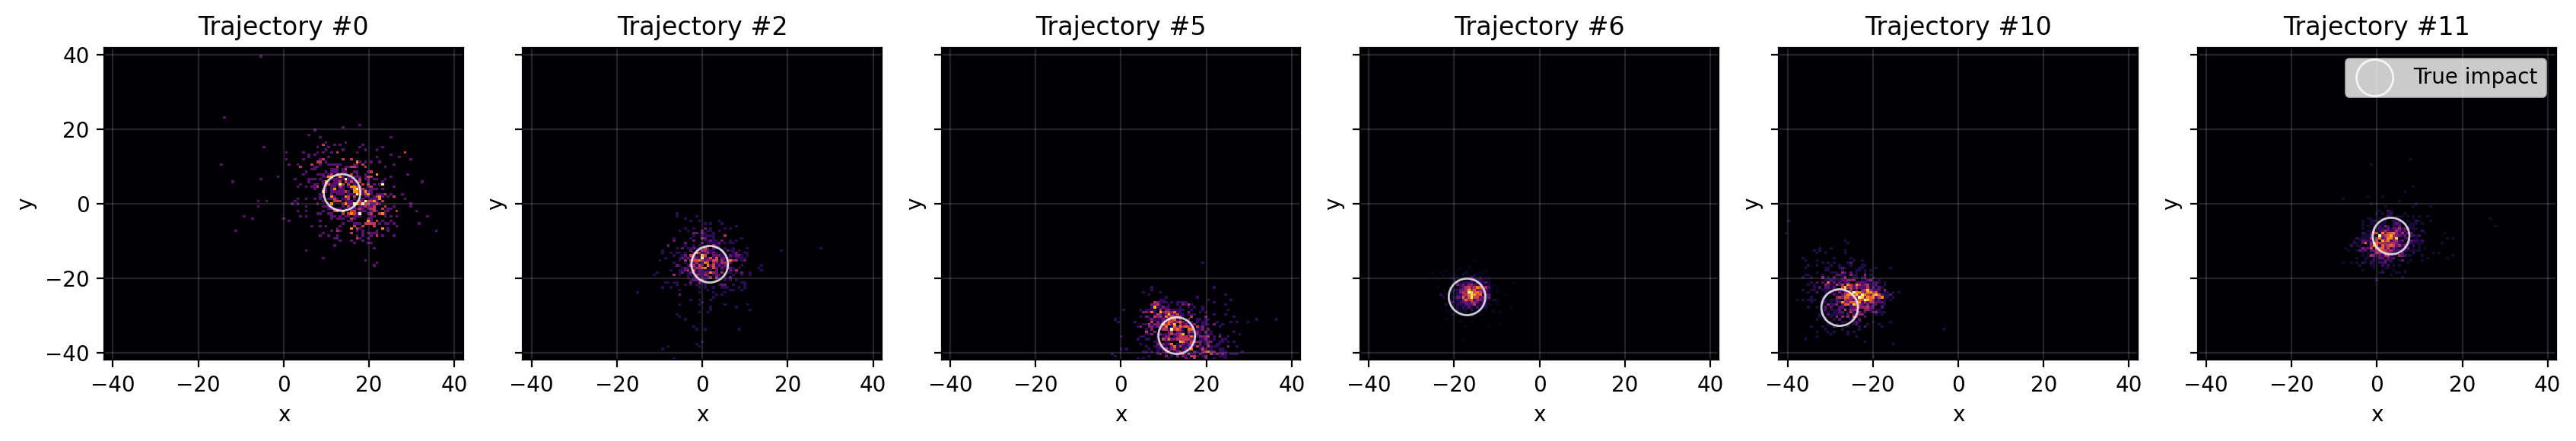

In [21]:
# Plot a heatmap of X_resimulation[0, impact_indices, :2]
fig, axes = plt.subplots(1, 6, figsize=(17, 3), sharey=True, dpi=200)

for i, (show_index, ax) in enumerate(zip(true_impact_indices[0], axes)):
    X_val_impact_position = X[show_index, true_impact_indices[1][np.where(true_impact_indices[0] == show_index)[0]][0], :]

    ax.hist2d(X_resimulation_impact_positions[show_index][:, 0], X_resimulation_impact_positions[show_index][:, 1], bins=np.linspace(-42, 42, 128), cmap='inferno');
    ax.scatter(X_val_impact_position[0], X_val_impact_position[1], s=300, marker='o', label='True impact', facecolors='none', edgecolors='white', alpha=0.8);
    ax.grid(axis='both', alpha=0.2);
    ax.set_xlabel('x');
    ax.set_ylabel('y');
    ax.set_title(f'Trajectory #{show_index}')

ax.legend();

fig.tight_layout()

plt.savefig(os.path.join(get_dir('results', f'{MODEL_NAME}', 'figures', create=True), 'resimulation_impact_heatmap.png'))

## Resimulations

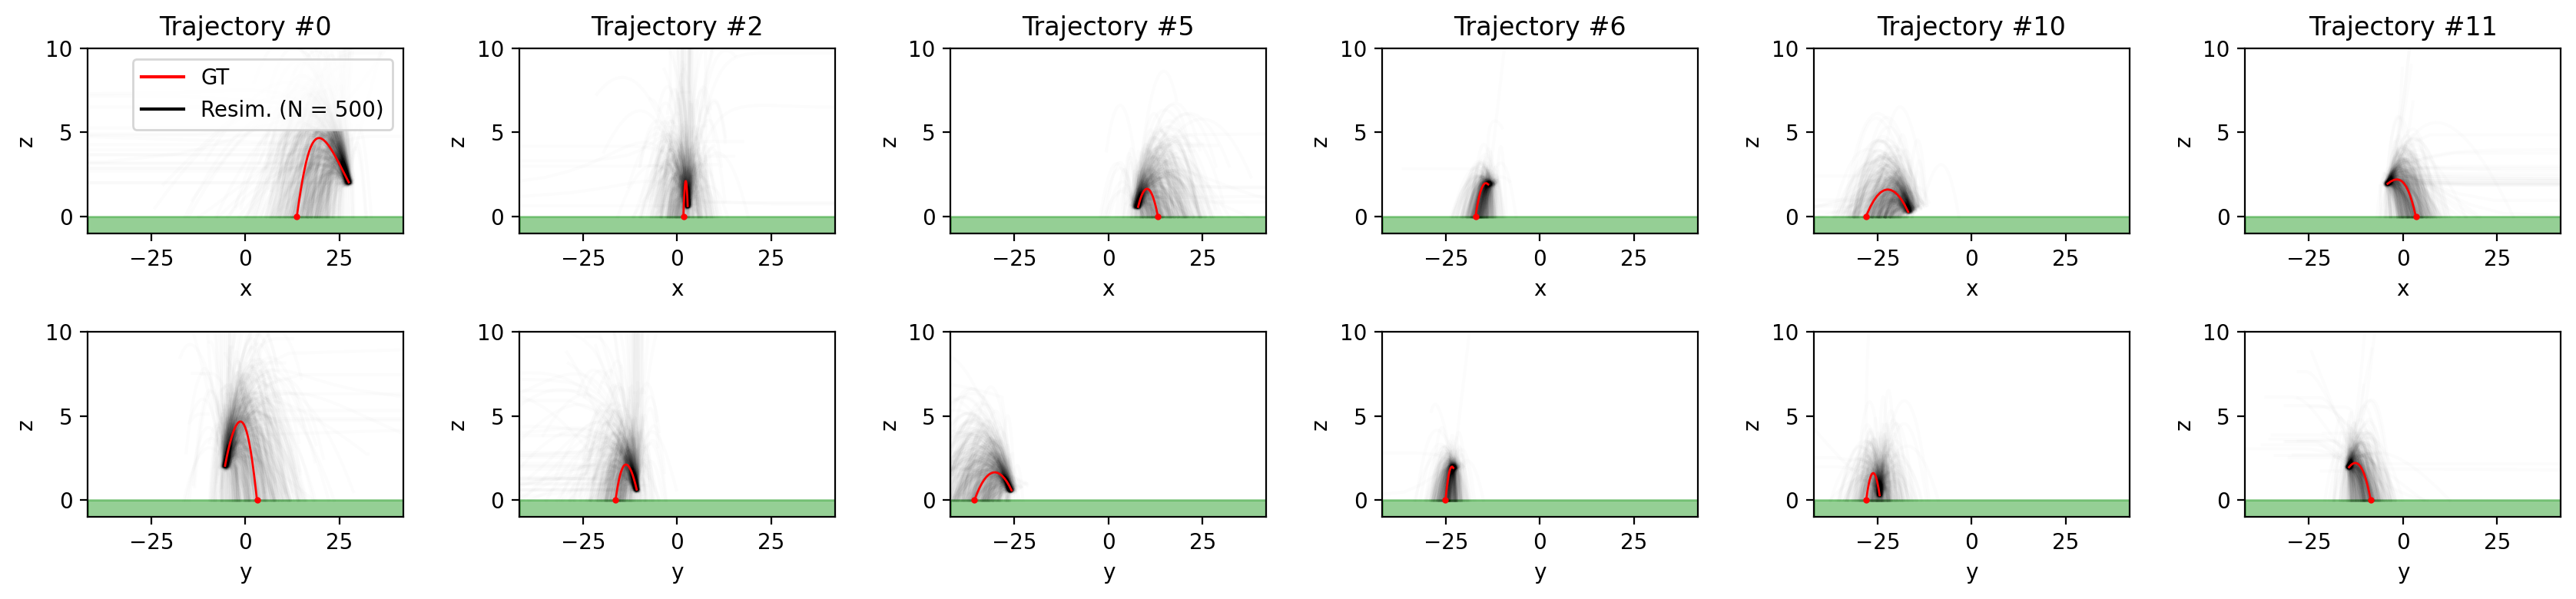

In [22]:
fig, axes = plt.subplots(2, 6, figsize=(17, 4), dpi=200)

n_trajectories = 500
max_time = 1000

for i, (ax_row, ax_name) in enumerate(zip(axes, ['x', 'y'])):
    for show_index, ax in zip(true_impact_indices[0], ax_row):
        ax.plot(X_resimulation[show_index, :n_trajectories, :max_time, i].T, X_resimulation[show_index, :n_trajectories, :max_time, 2].T, alpha=0.01, color='black');
        ax.plot(X[show_index, :, i], X[show_index, :, 2], label='Ground Truth', color='red', linewidth=1);
        ax.plot(X[show_index, -1, i], X[show_index, -1, 2], marker='o', markersize=2, color='red');
        ax.set_xlim(-42, 42)
        ax.set_ylim(-1, 10)
        ax.set_xlabel(ax_name);
        ax.set_ylabel('z');
        ax.axhspan(-2, 0, alpha=0.5, color='tab:green');

        if i == 0:
            ax.set_title(f'Trajectory #{show_index}')


# Add an additional legend for resimulation with red and black lines
red_patch = plt.Line2D([0], [0], color='red', label='GT')
black_patch = plt.Line2D([0], [0], color='black', label=f'Resim. (N = {n_trajectories})')
axes[0, 0].legend(handles=[red_patch, black_patch], loc='upper right');

fig.tight_layout()

plt.savefig(os.path.join(get_dir('results', f'{MODEL_NAME}', 'figures', create=True), 'resimulation.png'), dpi=200)